In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [31]:
data1=pd.read_csv("D:\Python\Project\May2022.csv")
data1.T.head()

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
Sl.No.,1,2,3,4,5,6,7,8,9,10,...,25,26,27,28,29,30,31,32,33,34
Factor,Physical performance,Schedules,(As on last day),Fleet Held,(As on last day),Fleet Utilisation (%),% off road vehicles,Schedule kms (in lakh),Effective Kilometers (in lakh),Vehicle Utilisation (in kms),...,Cost of Operation,(Rs. in lakh),Margin (Rs. in lakh),a. On traffic revenue,b. on gross revenue,Earnings Per Kilometer (in paise),(On traffic revenue),Earnings Per Kilometer (in paise),(On Gross revenue),Cost per kilometer (in paise)
Bengaluru Central,NaN,621.0,NaN,733.0,NaN,75.7,4.2,69.42,73.39,441.0,...,3987.83,NaN,NaN,-667.24,-395.38,4524.6,NaN,4895.0,NaN,5433.8
Ramanagara,NaN,457.0,NaN,491.0,NaN,86.9,2.2,43.56,41.33,323.0,...,1795.33,NaN,NaN,-487.38,-438.88,3164.4,NaN,3281.7,NaN,4343.5
Tumkuru,NaN,581.0,NaN,614.0,NaN,88.2,3.4,61.8,57.49,355.4,...,2476.12,NaN,NaN,-676.95,-565.95,3129.3,NaN,3322.3,NaN,4306.7


In [32]:
D1=data1.T
D1.columns=D1.iloc[1]
D1=D1[2:]
D1
col_to_keep=['Schedules','Fleet Held','Fleet Utilisation (%)','% off road  vehicles','Schedule kms (in lakh)', 'Effective Kilometers (in lakh)']
D1.drop(columns=[col for col in D1.columns if col not in col_to_keep],inplace=True)
#remove empty rows
D1.dropna(inplace=True)
D1
#adding a new column as city id
D1['City_Id'] = range(1, len(D1) + 1)
D1.columns
D1

Factor,Schedules,Fleet Held,Fleet Utilisation (%),% off road vehicles,Schedule kms (in lakh),Effective Kilometers (in lakh),City_Id
Bengaluru Central,621.0,733.0,75.7,4.2,69.42,73.39,1
Ramanagara,457.0,491.0,86.9,2.2,43.56,41.33,2
Tumkuru,581.0,614.0,88.2,3.4,61.8,57.49,3
Kolara,504.0,538.0,88.6,6.1,52.33,51.51,4
Chikkaballapura,521.0,574.0,89.7,2.7,54.97,54.5,5
Mysore,977.0,1091.0,82.3,3.4,94.88,92.33,6
Mandya,423.0,447.0,89.4,2.8,45.3,43.49,7
Chamarajanagar,465.0,509.0,90.9,3.7,47.03,47.2,8
Hassan,520.0,552.0,94.1,4.1,56.47,55.32,9
Chikkamagaluru,496.0,526.0,95.6,2.0,55.71,55.18,10


In [33]:
#Effective passenger density
#effPassDensity=(('Fleet Utilisation(%)')*0.01)*('Fleet Held')

FleetUtilisation=D1['Fleet Utilisation (%)']*0.01
FleetHeldArray=D1['Fleet Held']
EffPassDensity=np.multiply(FleetUtilisation,FleetHeldArray)
D1['EffPassDensity']=EffPassDensity

In [34]:
D1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16 entries, Bengaluru Central to KSRTC
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Schedules                       16 non-null     object
 1   Fleet Held                      16 non-null     object
 2   Fleet Utilisation (%)           16 non-null     object
 3   % off road  vehicles            16 non-null     object
 4   Schedule kms (in lakh)          16 non-null     object
 5   Effective Kilometers (in lakh)  16 non-null     object
 6   City_Id                         16 non-null     int64 
 7   EffPassDensity                  16 non-null     object
dtypes: int64(1), object(7)
memory usage: 1.1+ KB


In [35]:
D1.head()

Factor,Schedules,Fleet Held,Fleet Utilisation (%),% off road vehicles,Schedule kms (in lakh),Effective Kilometers (in lakh),City_Id,EffPassDensity
Bengaluru Central,621.0,733.0,75.7,4.2,69.42,73.39,1,554.881
Ramanagara,457.0,491.0,86.9,2.2,43.56,41.33,2,426.679
Tumkuru,581.0,614.0,88.2,3.4,61.8,57.49,3,541.548
Kolara,504.0,538.0,88.6,6.1,52.33,51.51,4,476.668
Chikkaballapura,521.0,574.0,89.7,2.7,54.97,54.5,5,514.878


In [36]:
D1.tail()

Factor,Schedules,Fleet Held,Fleet Utilisation (%),% off road vehicles,Schedule kms (in lakh),Effective Kilometers (in lakh),City_Id,EffPassDensity
Puttur,484.0,539.0,88.6,4.2,46.82,46.44,12,477.554
Davanagere,344.0,364.0,96.2,3.1,36.38,36.81,13,350.168
Shivamoga,321.0,352.0,85.7,6.3,34.36,35.59,14,301.664
Chitradurga,278.0,301.0,90.2,6.6,30.46,28.95,15,271.502
KSRTC,7496.0,8198.0,87.7,3.7,786.57,776.98,16,7189.646


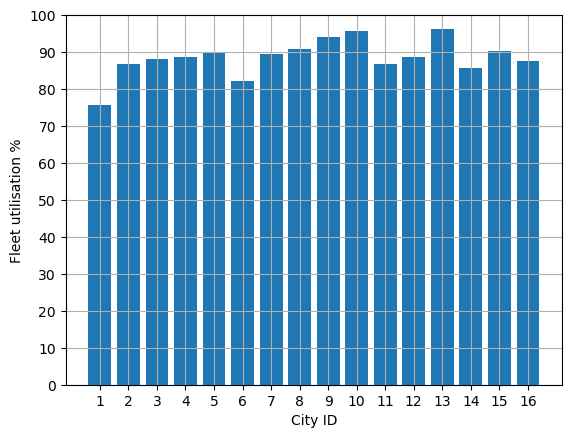

In [37]:
X=D1['City_Id']
Y=D1['Fleet Utilisation (%)']
plt.bar(X,Y)
plt.xlabel('City ID')
plt.ylabel('Fleet utilisation %')
plt.xticks(X)  # Set x-axis ticks to match city IDs
# Set y-axis range with a step of 10
plt.ylim(0, 100)  # Set the y-axis range from 0 to 100
plt.yticks(range(0, 101, 10))  # Set y-axis ticks with a step of 10
plt.grid(True)
plt.show()

In [24]:
D1=D1[:15]
D1

Factor,Schedules,Fleet Held,Fleet Utilisation (%),% off road vehicles,Schedule kms (in lakh),Effective Kilometers (in lakh),City_Id,EffPassDensity
Bengaluru Central,621.0,733.0,75.7,4.2,69.42,73.39,1,554.881
Ramanagara,457.0,491.0,86.9,2.2,43.56,41.33,2,426.679
Tumkuru,581.0,614.0,88.2,3.4,61.8,57.49,3,541.548
Kolara,504.0,538.0,88.6,6.1,52.33,51.51,4,476.668
Chikkaballapura,521.0,574.0,89.7,2.7,54.97,54.5,5,514.878
Mysore,977.0,1091.0,82.3,3.4,94.88,92.33,6,897.893
Mandya,423.0,447.0,89.4,2.8,45.3,43.49,7,399.618
Chamarajanagar,465.0,509.0,90.9,3.7,47.03,47.2,8,462.681
Hassan,520.0,552.0,94.1,4.1,56.47,55.32,9,519.432
Chikkamagaluru,496.0,526.0,95.6,2.0,55.71,55.18,10,502.856


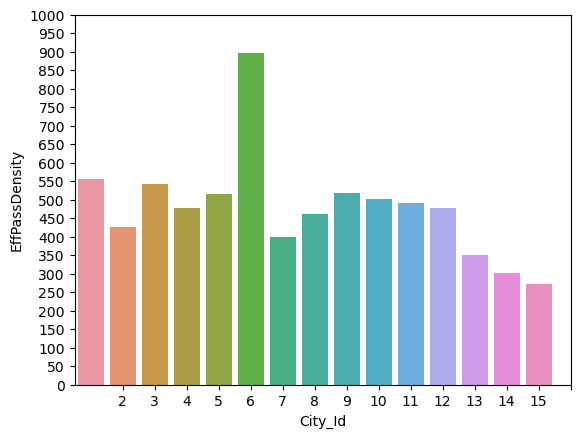

In [28]:
X=D1['City_Id']
Y=D1['EffPassDensity']
sns.barplot(x=X,y=Y,orient='v')
plt.xticks(X)
plt.ylim(0, 1000)  # Set the y-axis range from 0 to 100
plt.yticks(range(0, 1001, 50))
plt.show()

### Descriptive Statistic Analysis
Mean of EffectivePassengerDensity = meanEPD

In [27]:
meanEPD=np.mean(D1['EffPassDensity'])
print('Mean of Effective Passenger Density:',meanEPD)

D1['EffPassDensity'].values

Mean of Effective Passenger Density: 479.3451999999999


array([554.881, 426.67900000000003, 541.548, 476.668, 514.878,
       897.8929999999999, 399.61800000000005, 462.68100000000004, 519.432,
       502.856, 492.156, 477.55400000000003, 350.168, 301.66400000000004,
       271.502], dtype=object)

In [29]:
std_by_city = D1['EffPassDensity'].std()
variance=std_by_city**2
print('variance:',variance)
print('Standard deviation:',std_by_city)

variance: 20658.4208598857
Standard deviation: 143.73037556440775


In [30]:
#calculate the (X-mean) for each city and it as a column
XdiffMean=D1['EffPassDensity'][:15].values-meanEPD


NewD1={
    'City Id':D1['City_Id'][:15].values,
    'EffPassDensity':D1['EffPassDensity'][:15].values,
    'Mean Variations':XdiffMean
}
NewD1=pd.DataFrame(NewD1)
NewD1

,City Id,EffPassDensity,Mean Variations
0,1,554.881,75.5358
1,2,426.679,-52.6662
2,3,541.548,62.2028
3,4,476.668,-2.6772
4,5,514.878,35.5328
5,6,897.893,418.5478
6,7,399.618,-79.7272
7,8,462.681,-16.6642
8,9,519.432,40.0868
9,10,502.856,23.5108


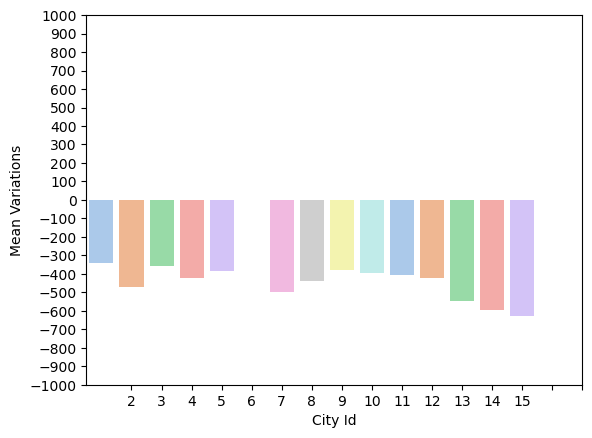

In [43]:
sns.barplot(x=NewD1['City Id'],y=NewD1['Mean Variations'],palette='pastel')
plt.xticks(X)
plt.ylim(0, 1000)  # Set the y-axis range from 0 to 100
plt.yticks(range(-1000, 1001, 100))
plt.show()

C:\Users\abhib\AppData\Local\Temp\ipykernel_23528\4241719585.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(pdf_values, shade = True)


<Axes: ylabel='Density'>

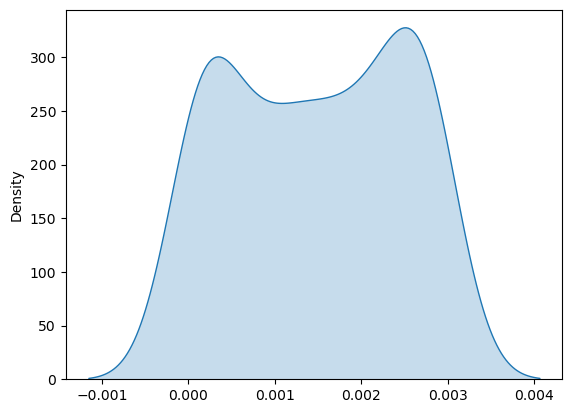

In [31]:
import statistics as stats
from scipy.stats import norm 
dfmean = np.mean(D1['EffPassDensity'])
sd = np.std(D1['EffPassDensity'])
sorted_data = D1['EffPassDensity'].sort_values()
X=np.linspace(D1['EffPassDensity'].min(),D1['EffPassDensity'].max(),100)
pdf_values = norm.pdf(X, dfmean, sd)
sns.kdeplot(pdf_values, shade = True)



In [32]:
Stats = D1.describe(include='all')
cols = Stats.index.tolist()
Stats

Factor,Schedules,Fleet Held,Fleet Utilisation (%),% off road vehicles,Schedule kms (in lakh),Effective Kilometers (in lakh),City_Id,EffPassDensity
count,15.0,15.0,15.0,15.0,15.00,15.00,15.000000,15.000
unique,14.0,15.0,14.0,13.0,15.00,15.00,NaN,15.000
top,504.0,733.0,88.6,4.2,69.42,73.39,NaN,554.881
freq,2.0,1.0,2.0,2.0,1.00,1.00,NaN,1.000
mean,NaN,NaN,NaN,NaN,NaN,NaN,8.000000,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,4.472136,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,4.500000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,8.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,11.500000,NaN


In [33]:
for j in cols:
    for i in Stats.columns:
        if j == 'mean' and pd.isna(Stats.loc[j, i]):
            Stats.loc[j, i] = D1[i].mean()
        elif j == 'std' and pd.isna(Stats.loc[j, i]):
            Stats.loc[j, i] = D1[i].std()
        elif j == 'min' and pd.isna(Stats.loc[j, i]):
            Stats.loc[j, i] = D1[i].min()
        elif j == 'max' and pd.isna(Stats.loc[j, i]):
            Stats.loc[j, i] = D1[i].max()
        elif j == '25%' and pd.isna(Stats.loc[j, i]):
            Stats.loc[j, i] = D1[i].quantile(q=0.25)
        elif j == '50%' and pd.isna(Stats.loc[j, i]):
            Stats.loc[j, i] = D1[i].quantile(q=0.50)
        elif j == '75%':
            Stats.loc[j, i] = D1[i].quantile(q=0.75)

Stats

Factor,Schedules,Fleet Held,Fleet Utilisation (%),% off road vehicles,Schedule kms (in lakh),Effective Kilometers (in lakh),City_Id,EffPassDensity
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
unique,14.000000,15.000000,14.000000,13.000000,15.000000,15.000000,NaN,15.000000
top,504.000000,733.000000,88.600000,4.200000,69.420000,73.390000,NaN,554.881000
freq,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000,NaN,1.000000
mean,499.733333,546.533333,88.593333,3.846667,52.438000,51.797333,8.000000,479.345200
std,161.364479,185.812450,5.123540,1.449072,15.790089,15.680343,4.472136,143.730376
min,278.000000,301.000000,75.700000,2.000000,30.460000,28.950000,1.000000,271.502000
25%,440.000000,469.000000,86.850000,2.850000,44.430000,42.410000,4.500000,413.148500
50%,496.000000,538.000000,88.600000,3.400000,52.330000,51.510000,8.000000,477.554000
75%,520.500000,570.500000,90.550000,4.200000,56.775000,56.375000,11.500000,517.155000


<class 'float'>


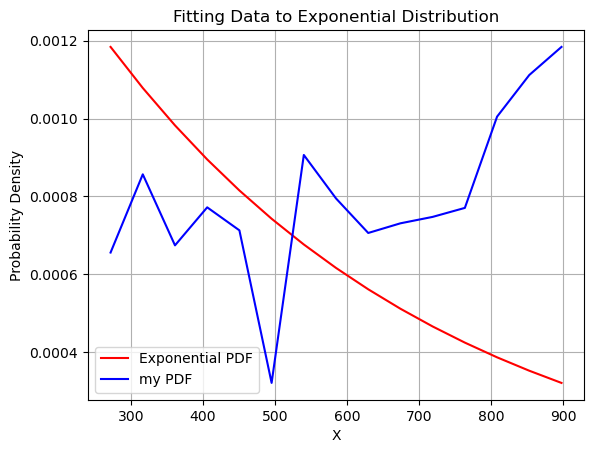

[0.00118404 0.00107852 0.00098241 0.00089486 0.00081511 0.00074247
 0.00067631 0.00061604 0.00056114 0.00051113 0.00046558 0.00042409
 0.0003863  0.00035187 0.00032051] [0.00065557 0.00085659 0.00067406 0.00077176 0.00071263 0.00032051
 0.00090634 0.00079461 0.00070589 0.00073073 0.00074722 0.00077034
 0.00100483 0.00111183 0.00118404]


In [34]:
from scipy.stats import expon

# Given data
data = D1['EffPassDensity'][0:15].to_numpy()
# Calculate lambda for the exponential distribution
lambda_param = 1 / data.mean()
print(type(data[0]))
myData=data.astype('float64')


# Generate x values for the plot
x_range = np.linspace(min(data), max(data), 15)
Data=-lambda_param*x_range
myData=-lambda_param*myData
# Calculate the exponential PDF values
pdf_values = np.exp(Data)
myPdf=np.exp(myData)

pdf_values=lambda_param*pdf_values
myPdf=lambda_param*myPdf

# Plot the exponential PDF curve
plt.plot(x_range, pdf_values, color='red', label='Exponential PDF')
plt.plot(x_range, myPdf, color='blue', label='my PDF')
plt.xlabel('X')
plt.ylabel('Probability Density')
plt.title('Fitting Data to Exponential Distribution')
plt.legend()
plt.grid(True)
plt.show()

print(pdf_values,myPdf)

In [35]:
import statistics as stats
from scipy.stats import norm 
import scipy.stats
Xfactor=D1['EffPassDensity'][:15].values
Yfactor=D1['Effective Kilometers (in lakh)'][:15].values
print(Xfactor.size,Yfactor.size)
R=scipy.stats.pearsonr(Xfactor,Yfactor)
print("Coefficient of correlation between EffPassDensity & Effective Kilometers (in lakh):",R[0])


15 15
Coefficient of correlation between EffPassDensity & Effective Kilometers (in lakh): 0.9572623101945494


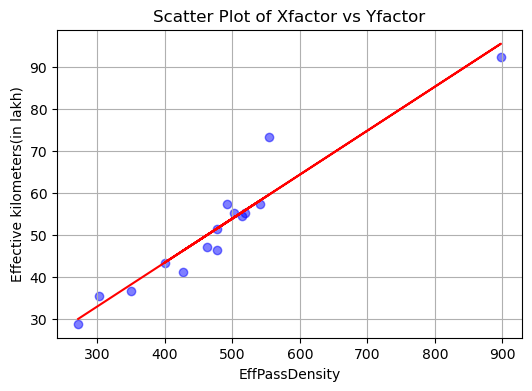

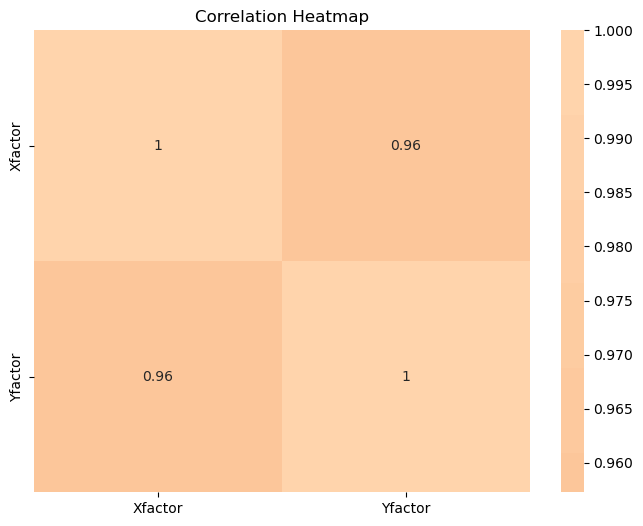

In [59]:
data = {
    'Xfactor': D1['EffPassDensity'][:15].values,
    'Yfactor': D1['Effective Kilometers (in lakh)'][:15].values
}
Df=pd.DataFrame(data)
corrMatrix=Df.corr()
corrMatrix
Df['Xfactor'] = pd.to_numeric(Df['Xfactor'])
Df['Yfactor'] = pd.to_numeric(Df['Yfactor'])

subset_df=Df[:15]
slope, intercept = np.polyfit(subset_df['Xfactor'], subset_df['Yfactor'], 1)
regression_line = slope * subset_df['Xfactor'] + intercept

plt.figure(figsize=(6, 4))
plt.scatter(Df['Xfactor'][:15], Df['Yfactor'][:15], color='blue', alpha=0.5)
plt.plot(subset_df['Xfactor'], regression_line, color='red', label='Regression Line')
plt.xlabel('EffPassDensity')
plt.ylabel('Effective kilometers(in lakh)')
plt.title('Scatter Plot of Xfactor vs Yfactor')
plt.grid(True)

plt.show()


plt.figure(figsize=(8, 6))
sns.heatmap(corrMatrix, annot=True,center=0,linecolor='blue')
plt.title('Correlation Heatmap')
plt.show()


In [50]:
#exporting the required dataframe

In [36]:
DF={'May2022':[D1['EffPassDensity'].count(),D1['EffPassDensity'].mean(),D1['EffPassDensity'].std(),D1['EffPassDensity'].min(),D1['EffPassDensity'].max(),R[0]]}
Df=pd.DataFrame(DF)
Df=Df.T
Df
Df.to_csv("Monthly.csv",mode="a",header=False)
data=pd.read_csv("Monthly.csv")


In [58]:
data.index=[0,1,2,3,4]
data

ValueError: Length mismatch: Expected axis has 0 elements, new values have 5 elements

,May2022,16.0,898.7389999999999,1683.3121351839652,271.502,7189.646,0.9572623101945494
